<a href="https://colab.research.google.com/github/CarolineAndradeR/Python/blob/master/Principais_metricas_de_relatorios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principais funções no Python**
*   **Mínimo, Máximo, média** - min(), max(), mean();
*   **Moda** - mode();
*   **Mediana** - median();
*   **Quartis, percentis** - quantile();
*   **Desvio médio absoluto** - mad();
*   **Variância, desvio-padrão** - var(), std();
*   **Contagem** - count().





In [ ]:
!pip install numpy
!pip install pandas
!pip install statsmodels
!pip install sklearn
!pip install scipy

**Estatística Descritiva**

In [ ]:
#Iniciando montagem do drive
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

arq_dados_paises = '/content/drive/MyDrive/hdi_paises.csv'
df_idh_paises = pd.read_csv(arq_dados_paises)
df_idh_paises.head()

In [ ]:
#Formato do DataFreme
#df_idh_paises.shape

#Propriedades do DataFreme
#df_idh_paises.info

#Metodo do DataFreme, formatos e tipos de dados (Mais detalhado)
#Retorna o valor em memoria utilizado
df_idh_paises.info()

#Tipos de dados de cada coluna
#df_idh_paises.dtypes

In [ ]:
#O \ é utilizado para quebrar a linha da instrução (Mais organizado e mais fácil para ler)
#Até mesmo para indentificar erros no código fica mais fácil

#df_idh_paises.groupby('Entity').agg(n - pd.NamedAgg('Entity', 'count')).reset_index()

#Quantas vezes um país aparece dentro do DataSet
contagem_idh_paises = df_idh_paises.groupby('Entity') \
                      .agg(n = pd.NamedAgg('Entity', 'count')) \
                      .reset_index()

contagem_idh_paises.sort_values(by='n')

In [10]:
#Renomeação de colunas (quando se tem poucos colunas pode ser feito dessa forma sem necessidade de utilizar o transletor)
df_idh_paises.columns = ['pais', 'codigo', 'ano', 'idh']

In [ ]:
#Tudo o que for feito em conjunto pode aplicar um conjunto de dados (groupby)
#Desvio medio absoluto (quem está mais próximo ou mais distancia da média)
#Sequência de execução
df_idh_paises.groupby('pais') \
              .agg(desvio_medio_abs_idh = pd.NamedAgg('idh', 'mad')) \
              .sort_values(by='desvio_medio_abs_idh') \
              .reset_index()

In [ ]:
#Var variação aplicada sobre IDH
#STD desvio padrão
#Sort_value ordenação dos dados
#Atentar a sintaxe da linguagem
df_idh_paises.groupby('pais') \
              .agg( vaiancia_idh = pd.NamedAgg('idh', 'var'),
                    desvio_padrao_idh = pd.NamedAgg('idh', 'std' ))\
              .sort_values('desvio_padrao_idh')\
              .reset_index()

In [ ]:
#Além de agrupar por pais tem a função de filtrar
#Mode maior frequencia de repetição
df_idh_paises.groupby('pais')['idh'] \
              .apply(lambda x: x.mode().iloc[0])\
              .to_frame()\
              .reset_index()

In [ ]:
#Retorna distribuição de cada função (partil)
df_idh_paises.groupby('pais').describe()

In [ ]:
#Analisar diferentes percentis, dividir os percentil
#Quantile divisão em que os valores vão ser retornados
#Filtrar valores extremos
df_idh_paises.groupby('pais')['idh'] \
              .apply(lambda x: x.quantile([0.05, 0.25, 0.5, 0.75, 0.95]))\
              .to_frame()\
              .reset_index()\
              .rename(columns={'level_1': 'percentil'})

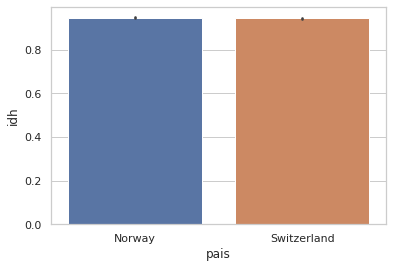

In [28]:
import seaborn as sns
#Definição de um tema (visual)
sns.set_theme(style='whitegrid')

#Conjunto de dados, buscando apenas os 10 menores com base na ordenação do sort
#ax = sns.barplot(x="pais", y="idh", data=df_idh_paises.sort_values(by='idh')[:10])

#Conjunto de dados, buscando apenas os 10 maiores com base na ordenação do sort
ax = sns.barplot(x="pais", y="idh", data=df_idh_paises.sort_values(by='idh')[-10:])